Ajustes iniciales

In [2]:
from google.colab import drive
drive.mount('/content/drive')


# Importación de bibliotecas y adjuntos
import pandas as pd

inmuebles = pd.read_csv('/content/drive/MyDrive/InmersionDeDatos/BasesDeDatos/inmuebles_bogota.csv')

# Tratamiento de la base de datos
columnas = {'Baños':'Banos','Área':'Area'}
inmuebles = inmuebles.rename(columns =columnas)

Mounted at /content/drive


#**Tratamiento de Datos y Primeros Gráficos**

In [3]:
# Informacion del dataset
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


##Tratamiento de la columna Valor
Al ser de tipo object(contiene strings) hay que convertirla a un tipo numerico para poder realizar operaciones con los valores

In [4]:
#Separa en un string,por defecto donde hay caracteres de espacio
inmuebles.Valor[0].split()

['$', '360.000.000']

In [5]:
# La columna es de tipo series(aunque contenga strings) asi que hay que convertirla para ejecutar .split()
# 'expand = True' devuelve el resultado en un DF
valor = inmuebles.Valor.str.split(expand = True)

In [6]:
#Agregando columnas al dataset
inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]
inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio
7024,Apartamento,Apartamento en venta en Suba,3,4,192,Suba,Suba,$ 1.200.000.000,$,1.200.000.000
1587,Apartamento,Apartamento en venta en Usaquén,4,5,224,Usaquén,Usaquén,$ 1.600.000.000,$,1.600.000.000
6971,Apartamento,Apartamento en venta en Usaquén,3,2,98,Usaquén,Usaquén,$ 500.000.000,$,500.000.000


In [7]:
# Precio aun es de tipo object
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
 8   Moneda        9520 non-null   object
 9   Precio        9520 non-null   object
dtypes: int64(3), object(7)
memory usage: 743.9+ KB


In [8]:
#Elimina el '.' de cada valor
inmuebles['Precio'] = inmuebles.Precio.str.replace('.', '', regex=True)

In [9]:
# Transforma el tipo de dato del Precio
#La division entre 1Millon se realiza para facilitar la comprensión de los datos
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Banos          9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   Moneda         9520 non-null   object 
 9   Precio         9520 non-null   object 
 10  Precio_Millon  9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.2+ KB


In [10]:
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,9520.000000,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706,602.062354
std,2.049856,1.255314,1731.379622,704.602062
min,1.000000,0.000000,2.000000,60.000000
25%,2.000000,2.000000,57.000000,250.000000
50%,3.000000,2.000000,80.000000,409.182500
75%,3.000000,3.000000,135.000000,680.000000
max,110.000000,9.000000,166243.000000,16000.000000


In [11]:
pd.set_option('display.precision',2)
pd.set_option('display.float_format',lambda x:'%.2f' % x )
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


In [12]:
inmuebles.loc[inmuebles.Habitaciones == 110]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,$,480000000,480.00


In [13]:
inmuebles.loc[inmuebles.Area == 2]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
8401,Apartamento,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000,$,180000000,180.00


<Axes: ylabel='Frequency'>

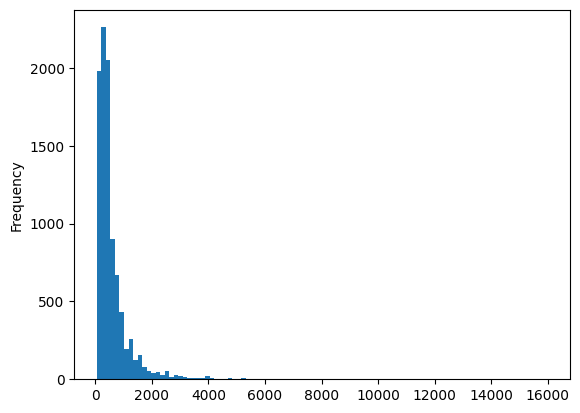

In [14]:
#Histograma
#Muestra la distribusion de la frecuencia de las variables
inmuebles['Precio_Millon'].plot.hist(bins=100)

##Otras bibliotecas para visualizar datos
Seaborn y Matplotlib

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

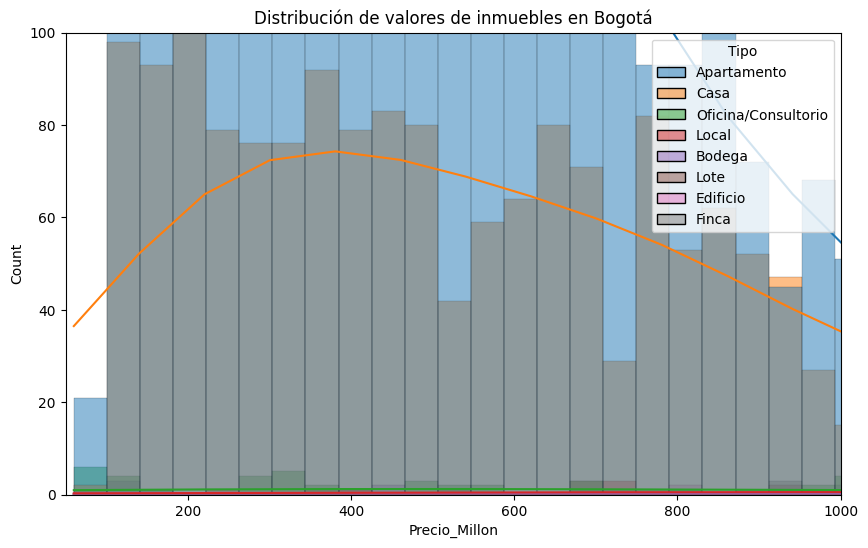

In [16]:
#lienzo de matplotlib
# Es buena practica establecer un tamaño para  la visualizacion 
plt.figure(figsize=(10,6))
grafico = sns.histplot(data=inmuebles,x='Precio_Millon',kde=True, hue='Tipo')
grafico.set_title('Distribución de valores de inmuebles en Bogotá')

#Establecer limite en el eje x de la grafica
plt.xlim((50,1000))
#Establecer limite en el eje y de la grafica
plt.ylim((0,100))

plt.savefig('/content/drive/MyDrive/InmersionDeDatos/Imagenes/grafico_de_valores.png', format='png')
plt.show()  

#Desafíos

### 1. Estudiar mejor el histograma de valores
Seleccionar 3 tipos de inmuebles (Refinar el gråfico: Titulos, aumentar el tamaño de labels. colores. conclusión de la información,)

Text(0.5, 0, 'Precio en millones de pesos')

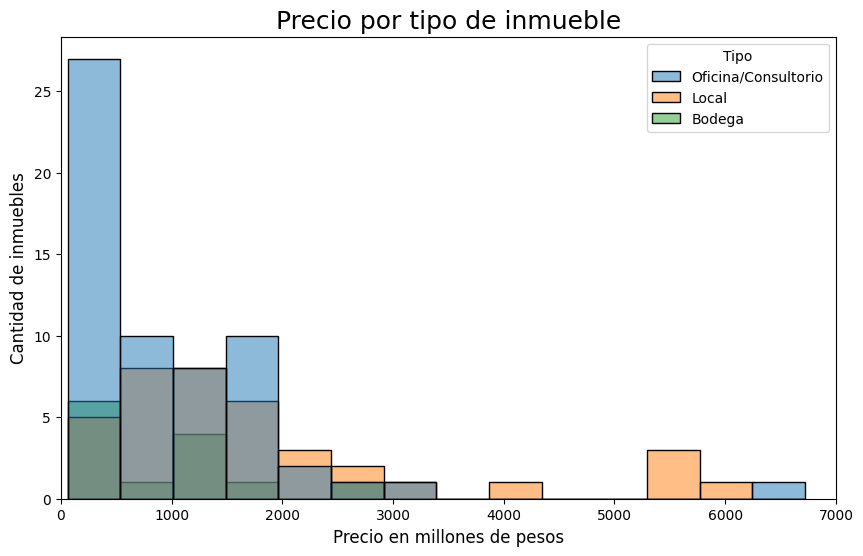

In [86]:
plt.figure(figsize=(10,6))
plt.xlim(0,7000)
grafico2 = sns.histplot(data=inmuebles.query("Tipo in ['Local','Bodega','Oficina/Consultorio']"),x='Precio_Millon',hue='Tipo',fill=True,kde=False)
plt.title('Precio por tipo de inmueble',fontsize=18)
plt.ylabel('Cantidad de inmuebles',fontsize = 12)
plt.xlabel('Precio en millones de pesos',fontsize = 12)

####Conclusiones 
1. La mayoria de inmuebles de este tipo se concentran entre los 100 y los 2000 millones de pesos

2. Cerca de la mitad de inmuebles de tipo Oficina/Consultorio se encuentran el un rango de precio inferior a 1000 millones

3. Las bodegas se encuentran casi exclusivamente entre los rangos de precio mas bajos, esto puede ser debido a que los requerimientos de estas son mas sencillos de suplir, al no ser lugares de habitacion o de trabajos sofisticados

In [93]:
inmuebles[inmuebles.Tipo == 'Oficina/Consultorio'].sort_values('Precio_Millon').

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
4847,Oficina/Consultorio,Oficina/Consultorio en venta en La Candelaria,1,2,24,La Candelaria,La Candelaria,$ 60.000.000,$,60000000,60.00
4844,Oficina/Consultorio,Oficina/Consultorio en venta en La Candelaria,1,1,24,La Candelaria,La Candelaria,$ 74.300.000,$,74300000,74.30
2464,Oficina/Consultorio,Oficina/Consultorio en venta en Las Aguas,1,1,25,Las Aguas,La Candelaria,$ 90.000.000,$,90000000,90.00
4887,Oficina/Consultorio,Oficina/Consultorio en venta en Las Aguas,1,1,25,Las Aguas,La Candelaria,$ 90.000.000,$,90000000,90.00
8506,Oficina/Consultorio,Oficina/Consultorio en venta en Chapinero,1,1,15,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 95.000.000,$,95000000,95.00
8701,Oficina/Consultorio,Oficina/Consultorio en venta en Chapinero,1,1,15,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 95.000.000,$,95000000,95.00
8729,Oficina/Consultorio,Oficina/Consultorio en venta en Puente Largo,1,1,16,Puente Largo,La Alhambra,$ 113.000.000,$,113000000,113.00
2317,Oficina/Consultorio,Oficina/Consultorio en venta en Chapinero,1,1,21,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 130.000.000,$,130000000,130.00
8700,Oficina/Consultorio,Oficina/Consultorio en venta en Chapinero,1,1,20,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 135.000.000,$,135000000,135.00
8505,Oficina/Consultorio,Oficina/Consultorio en venta en Chapinero,1,1,20,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 135.000.000,$,135000000,135.00


###2. Precio del m2 por barrio

<Axes: xlabel='Barrio'>

<Figure size 1000x600 with 0 Axes>

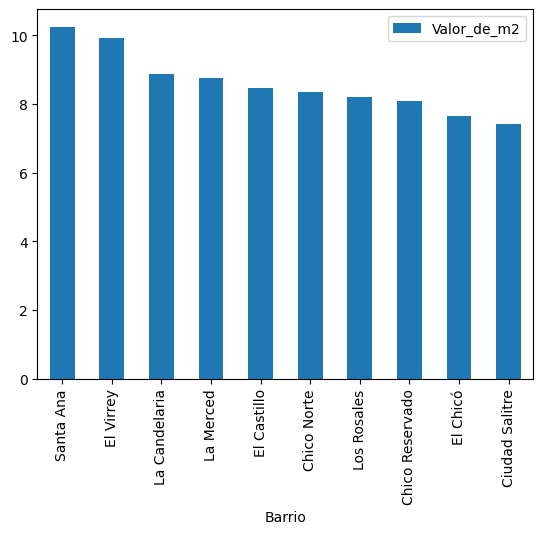

In [52]:
precio_de_metro_cuadrado = (pd.DataFrame(inmuebles.groupby('Barrio').Precio_Millon.sum() / inmuebles.groupby('Barrio').Area.sum())).sort_values(0,ascending=False)
precio_de_metro_cuadrado.rename(columns={0:'Valor_de_m2'}, inplace=True)
plt.figure(figsize=(10,6))

precio_de_metro_cuadrado.head(10).plot.bar()